# Probability and Python

## Import libraries

In [2]:
import numpy as np #handles arrays 
import matplotlib.pyplot as plt #for plotting (basic)
import seaborn as sns #also for plotting 

from scipy.stats import bernoulli #for example (Question #4 in HW)

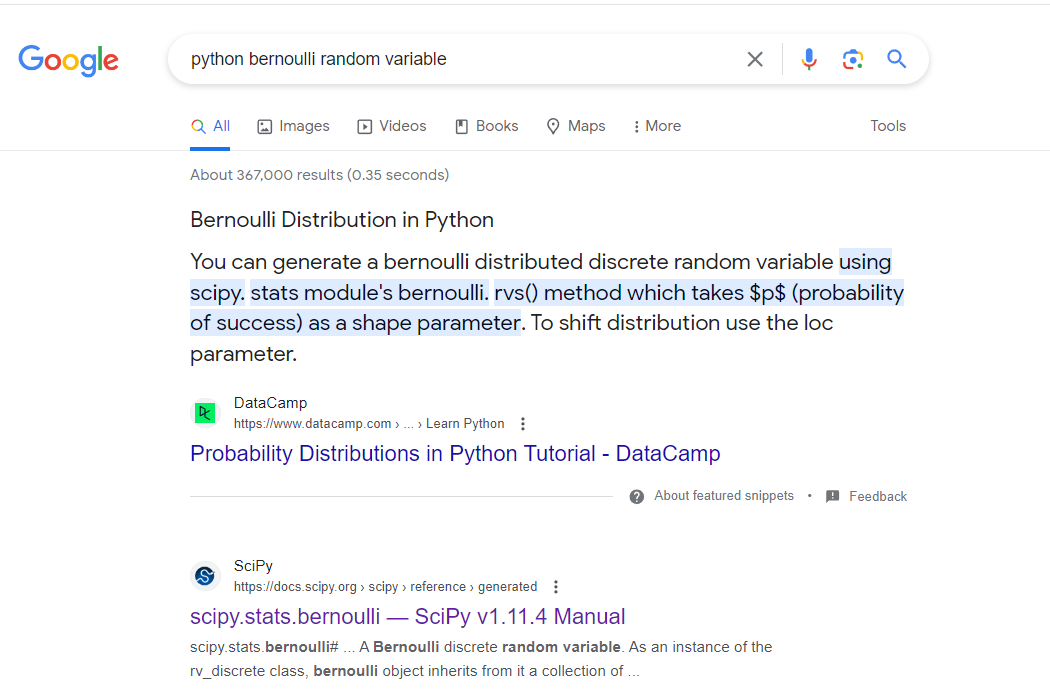

## Find the mean and variance for different values of p

### Single value of p

In [38]:
#step 1: start with one value of p and print the mean and variance: 
p=0.3
mean, var = bernoulli.stats(p, moments='mv') #from scipy, find the mean and variance for bernuolli distribution 
print('For p={0:0.2f} the mean is {1:0.2f} and the variance is {2:0.3f}'.format(p, mean, var)) #print

For p=0.30 the mean is 0.30 and the variance is 0.210


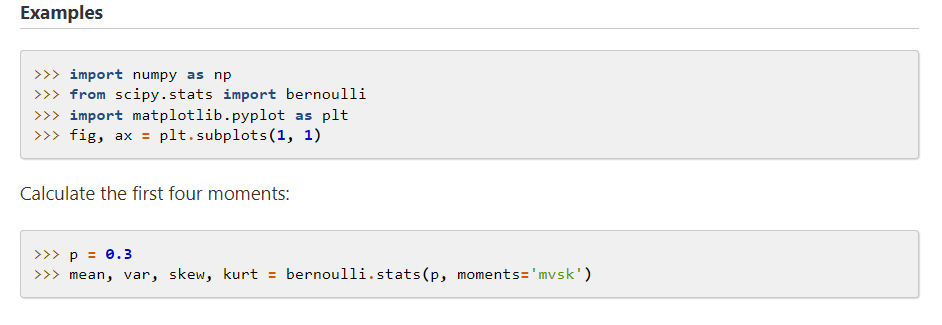

### Multiple value of p

In [40]:
#step 2: instead of inserting a new p each time, create a numpy array of all the ps you want to check and loop over them:
ps = np.array([0.3,0.5,0.7,0.22]) #values of ps we want to find the mean and variance for 
for p in ps:
    mean, var = bernoulli.stats(p, moments='mv') #from scipy, find the mean and variance for bernuolli distribution 
    print('For p={0:0.2f} the mean is {1:0.2f} and the variance is {2:0.2f}'.format(p, mean, var)) #print

For p=0.30 the mean is 0.30 and the variance is 0.21
For p=0.50 the mean is 0.50 and the variance is 0.25
For p=0.70 the mean is 0.70 and the variance is 0.21
For p=0.22 the mean is 0.22 and the variance is 0.17


In [42]:
#step 3: saving your results, in either a list, numyp array or dictionary. 
ps = np.array([0.3,0.5,0.7,0.22]) #values of ps we want to find the mean and variance for 
mean_list=[] #example of how to save your results in a list 
var_dict={} #example of how to save your results in a dictionary 
for p in ps:
    mean, var = bernoulli.stats(p, moments='mv') #from scipy, find the mean and variance for bernuolli distribution 
    mean_list.append(mean) 
    var_dict[p]=var
    print('For p={0:0.2f} the mean is {1:0.2f} and the variance is {2:0.2f}'.format(p, mean, var)) #print

For p=0.30 the mean is 0.30 and the variance is 0.21
For p=0.50 the mean is 0.50 and the variance is 0.25
For p=0.70 the mean is 0.70 and the variance is 0.21
For p=0.22 the mean is 0.22 and the variance is 0.17


In [43]:
#check
for i, p in enumerate(ps): 
    print('For p={0:0.2f} the mean is {1:0.2f} and the variance is {2:0.2f}'.format(p, mean_list[i], var_dict[p])) #print

For p=0.30 the mean is 0.30 and the variance is 0.21
For p=0.50 the mean is 0.50 and the variance is 0.25
For p=0.70 the mean is 0.70 and the variance is 0.21
For p=0.22 the mean is 0.22 and the variance is 0.17


## Plot the pmf for different values of p

### Single value of p

In [45]:
#possible to do it directly from bernoulli.pmf, we will show how to do it using a histogram
#first generate 1000 sample points from the bernoulli sdistribution.
#we will start with a single value of p, to get the hang of it
p=0.3
r = bernoulli.rvs(p, size=1000)

<Axes: ylabel='Probability'>

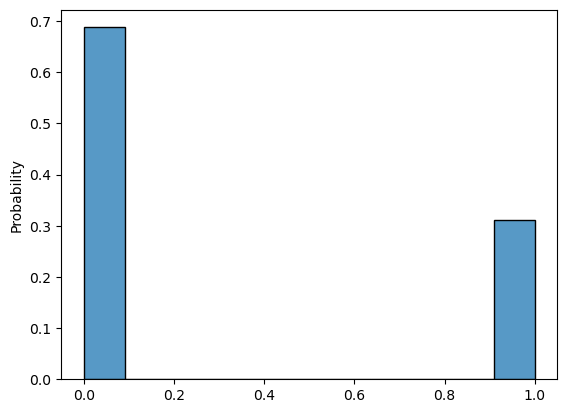

In [54]:
#next, plot the samples you generated. One possible option is to do it with 'sns.histplot'
#make sure to use the correct 'stat' (see seaborn histplot documentation). We will use 'probability'.
sns.histplot(r, stat='probability')

Text(0.5, 1.0, 'pmf for p=0.2')

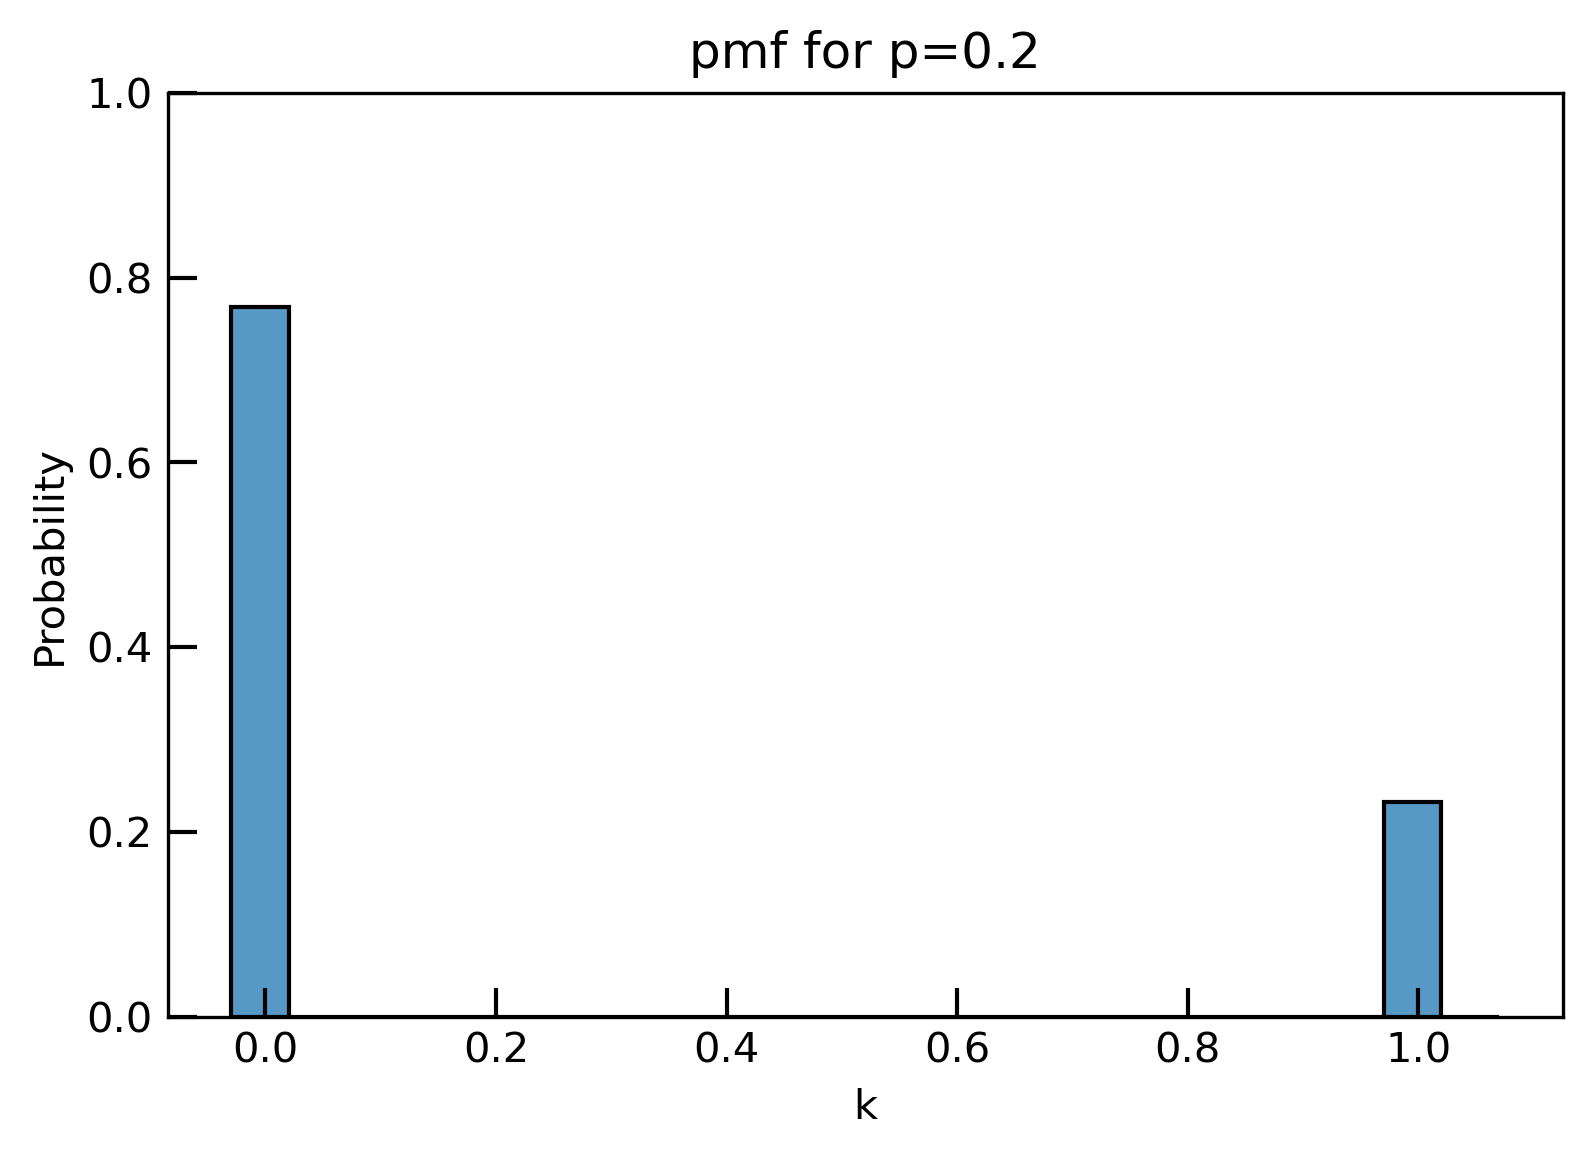

In [99]:
#Format your figure, to make it as clear as possible to reader, and to convey your story/point across:

#its common to use fig,ax=.... when plotting
row_num,col_num=1,1 #displaying 1 figure, so one row and one column is enough
fig,ax = plt.subplots(row_num,col_num) #declare your figure 
fig.set_size_inches(6*col_num,4*row_num) #size formatting 
fig.set_dpi(300) #resolution 


sns.histplot(r, stat='probability',  binwidth=0.05, binrange=[-0.03, 1.05], ax=ax) #format the bins and ticks such that the bins are more narrow and the ticks are at the center of the bins
ax.set_ylim([0,1]) #the probability values range from 0 to 1

ax.tick_params(axis='both', which='major', direction='in', length=7, width=1) #its common to have ticks face inwards 
ax.set_xlabel('k') #label your axes
ax.set_title('pmf for p={0:0.1f}'.format(p))

### Multiple values of p

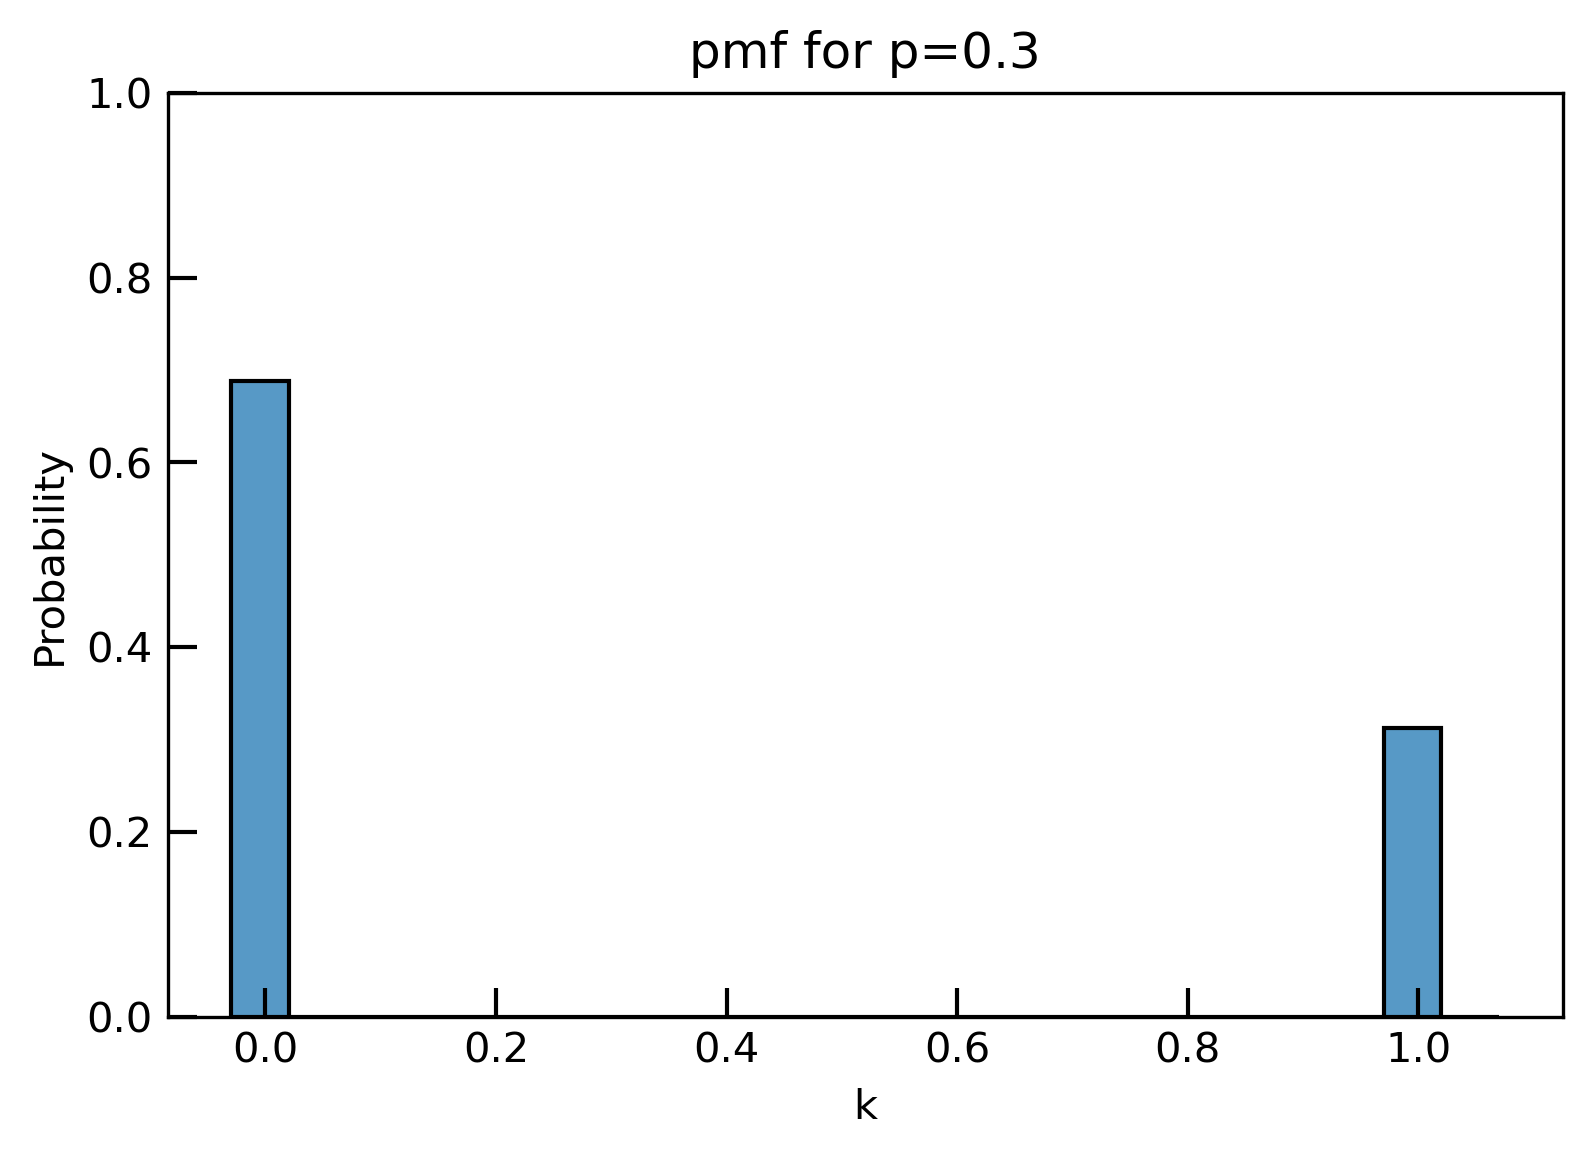

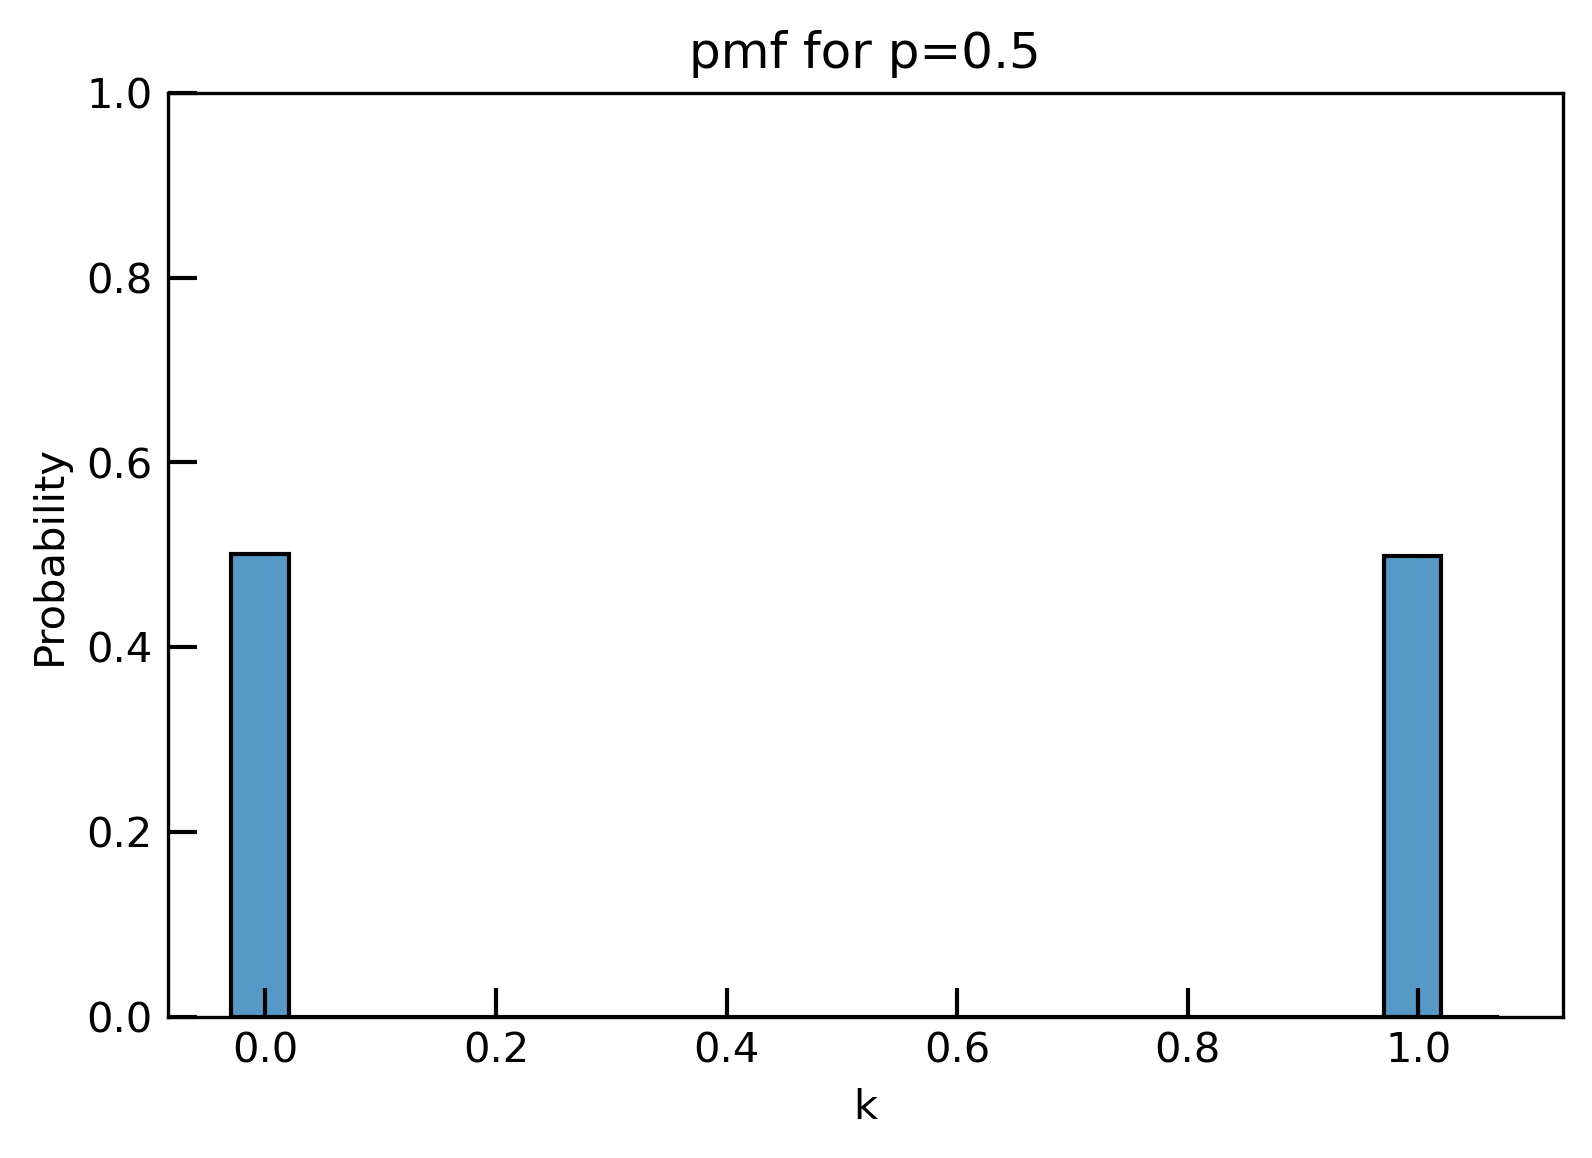

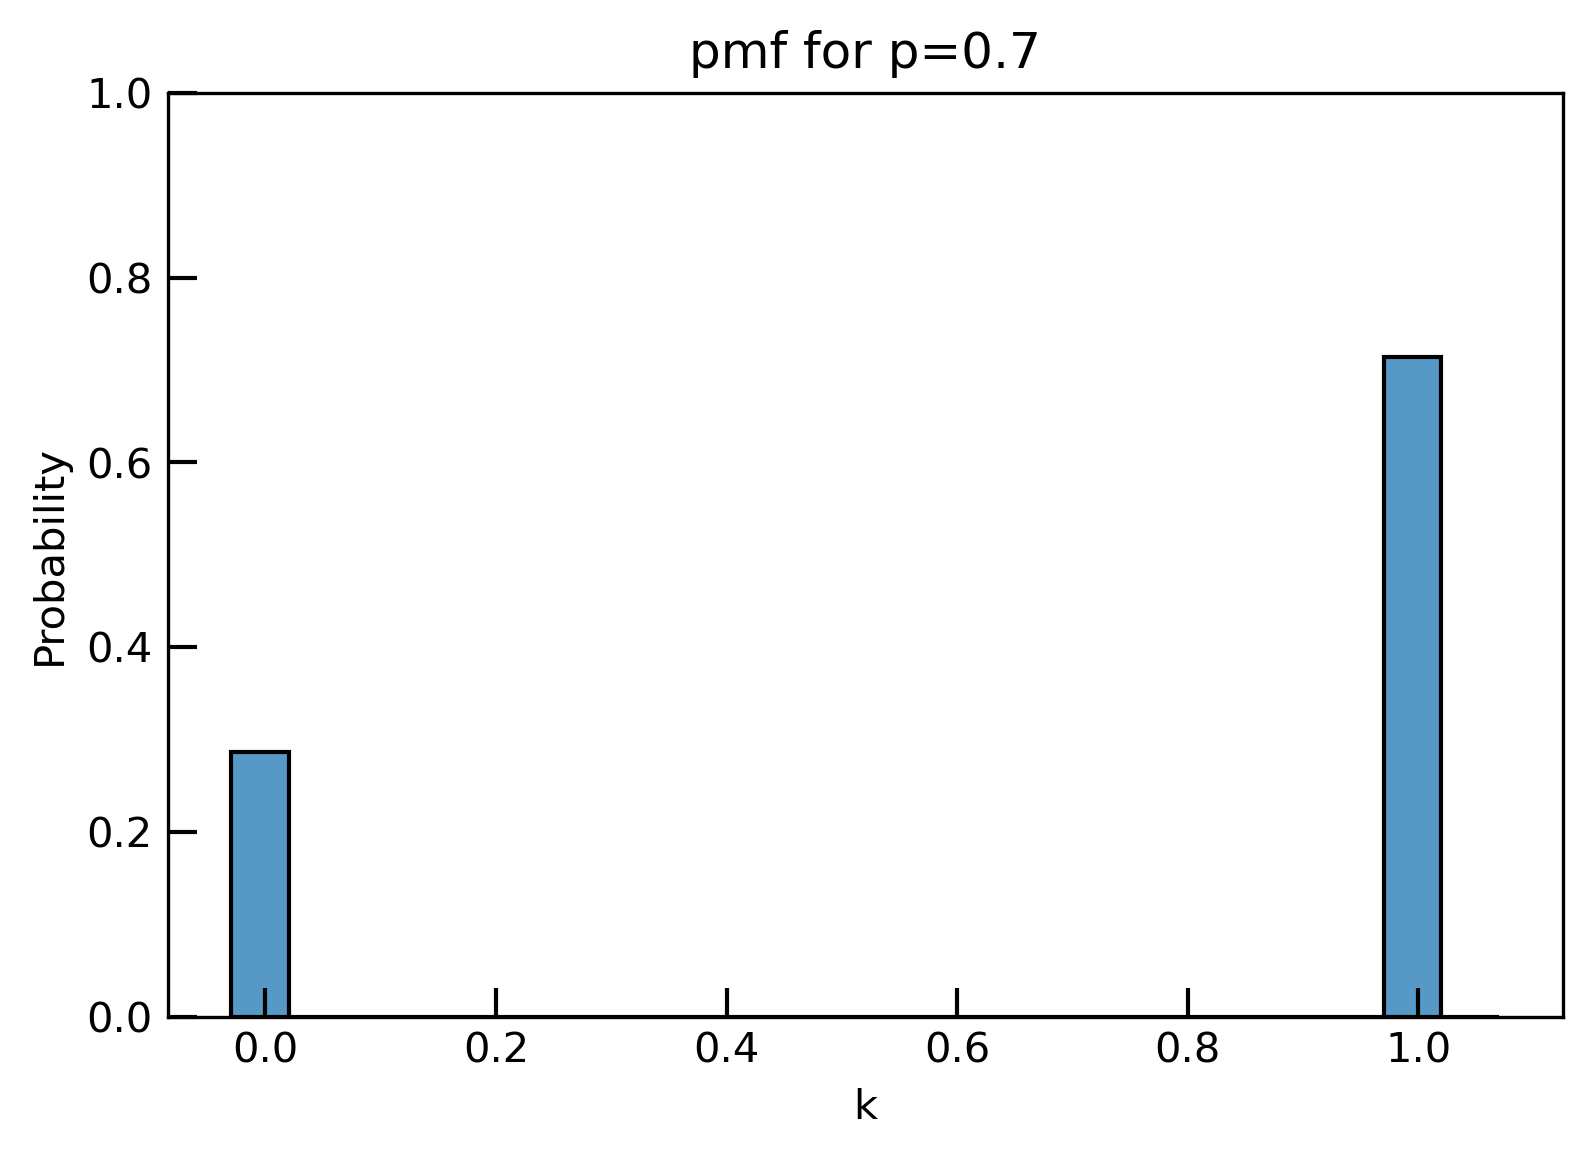

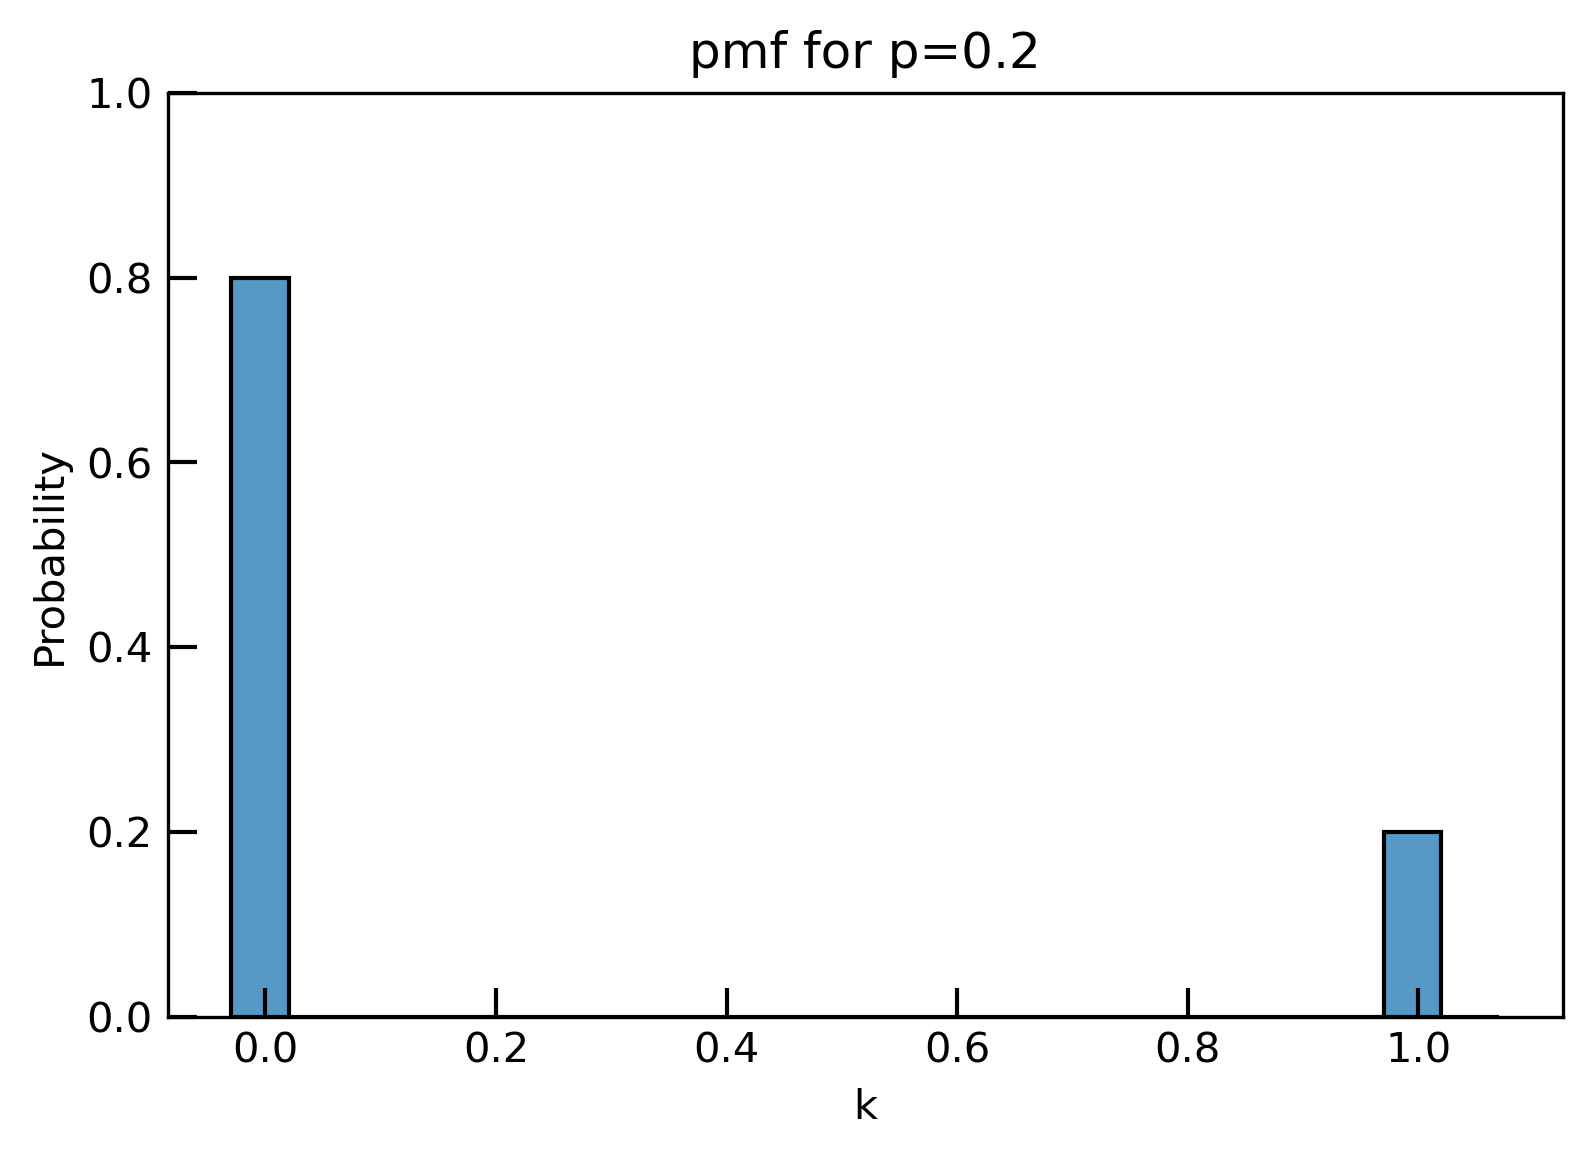

In [96]:
#we will first take what we did above and loop it for all values of p
ps = np.array([0.3,0.5,0.7,0.22])
for p in ps:
    r = bernoulli.rvs(p, size=1000) #sampling 

    #plotting
    row_num,col_num=1,1 #displaying 1 figure, so one row and one column is enough
    fig,ax = plt.subplots(row_num,col_num) #declare your figure 
    fig.set_size_inches(6*col_num,4*row_num) #size formatting 
    fig.set_dpi(300) #resolution 
    
    
    sns.histplot(r, stat='probability',  binwidth=0.05, binrange=[-0.03, 1.05], ax=ax) #format the bins and ticks such that the bins are more narrow and the ticks are at the center of the bins
    ax.set_ylim([0,1]) #the probability values range from 0 to 1
    ax.tick_params(axis='both', which='major', direction='in', length=7, width=1) #its common to have ticks face inwards 
    ax.set_xlabel('k') #label your axes
    ax.set_title('pmf for p={0:0.1f}'.format(p))

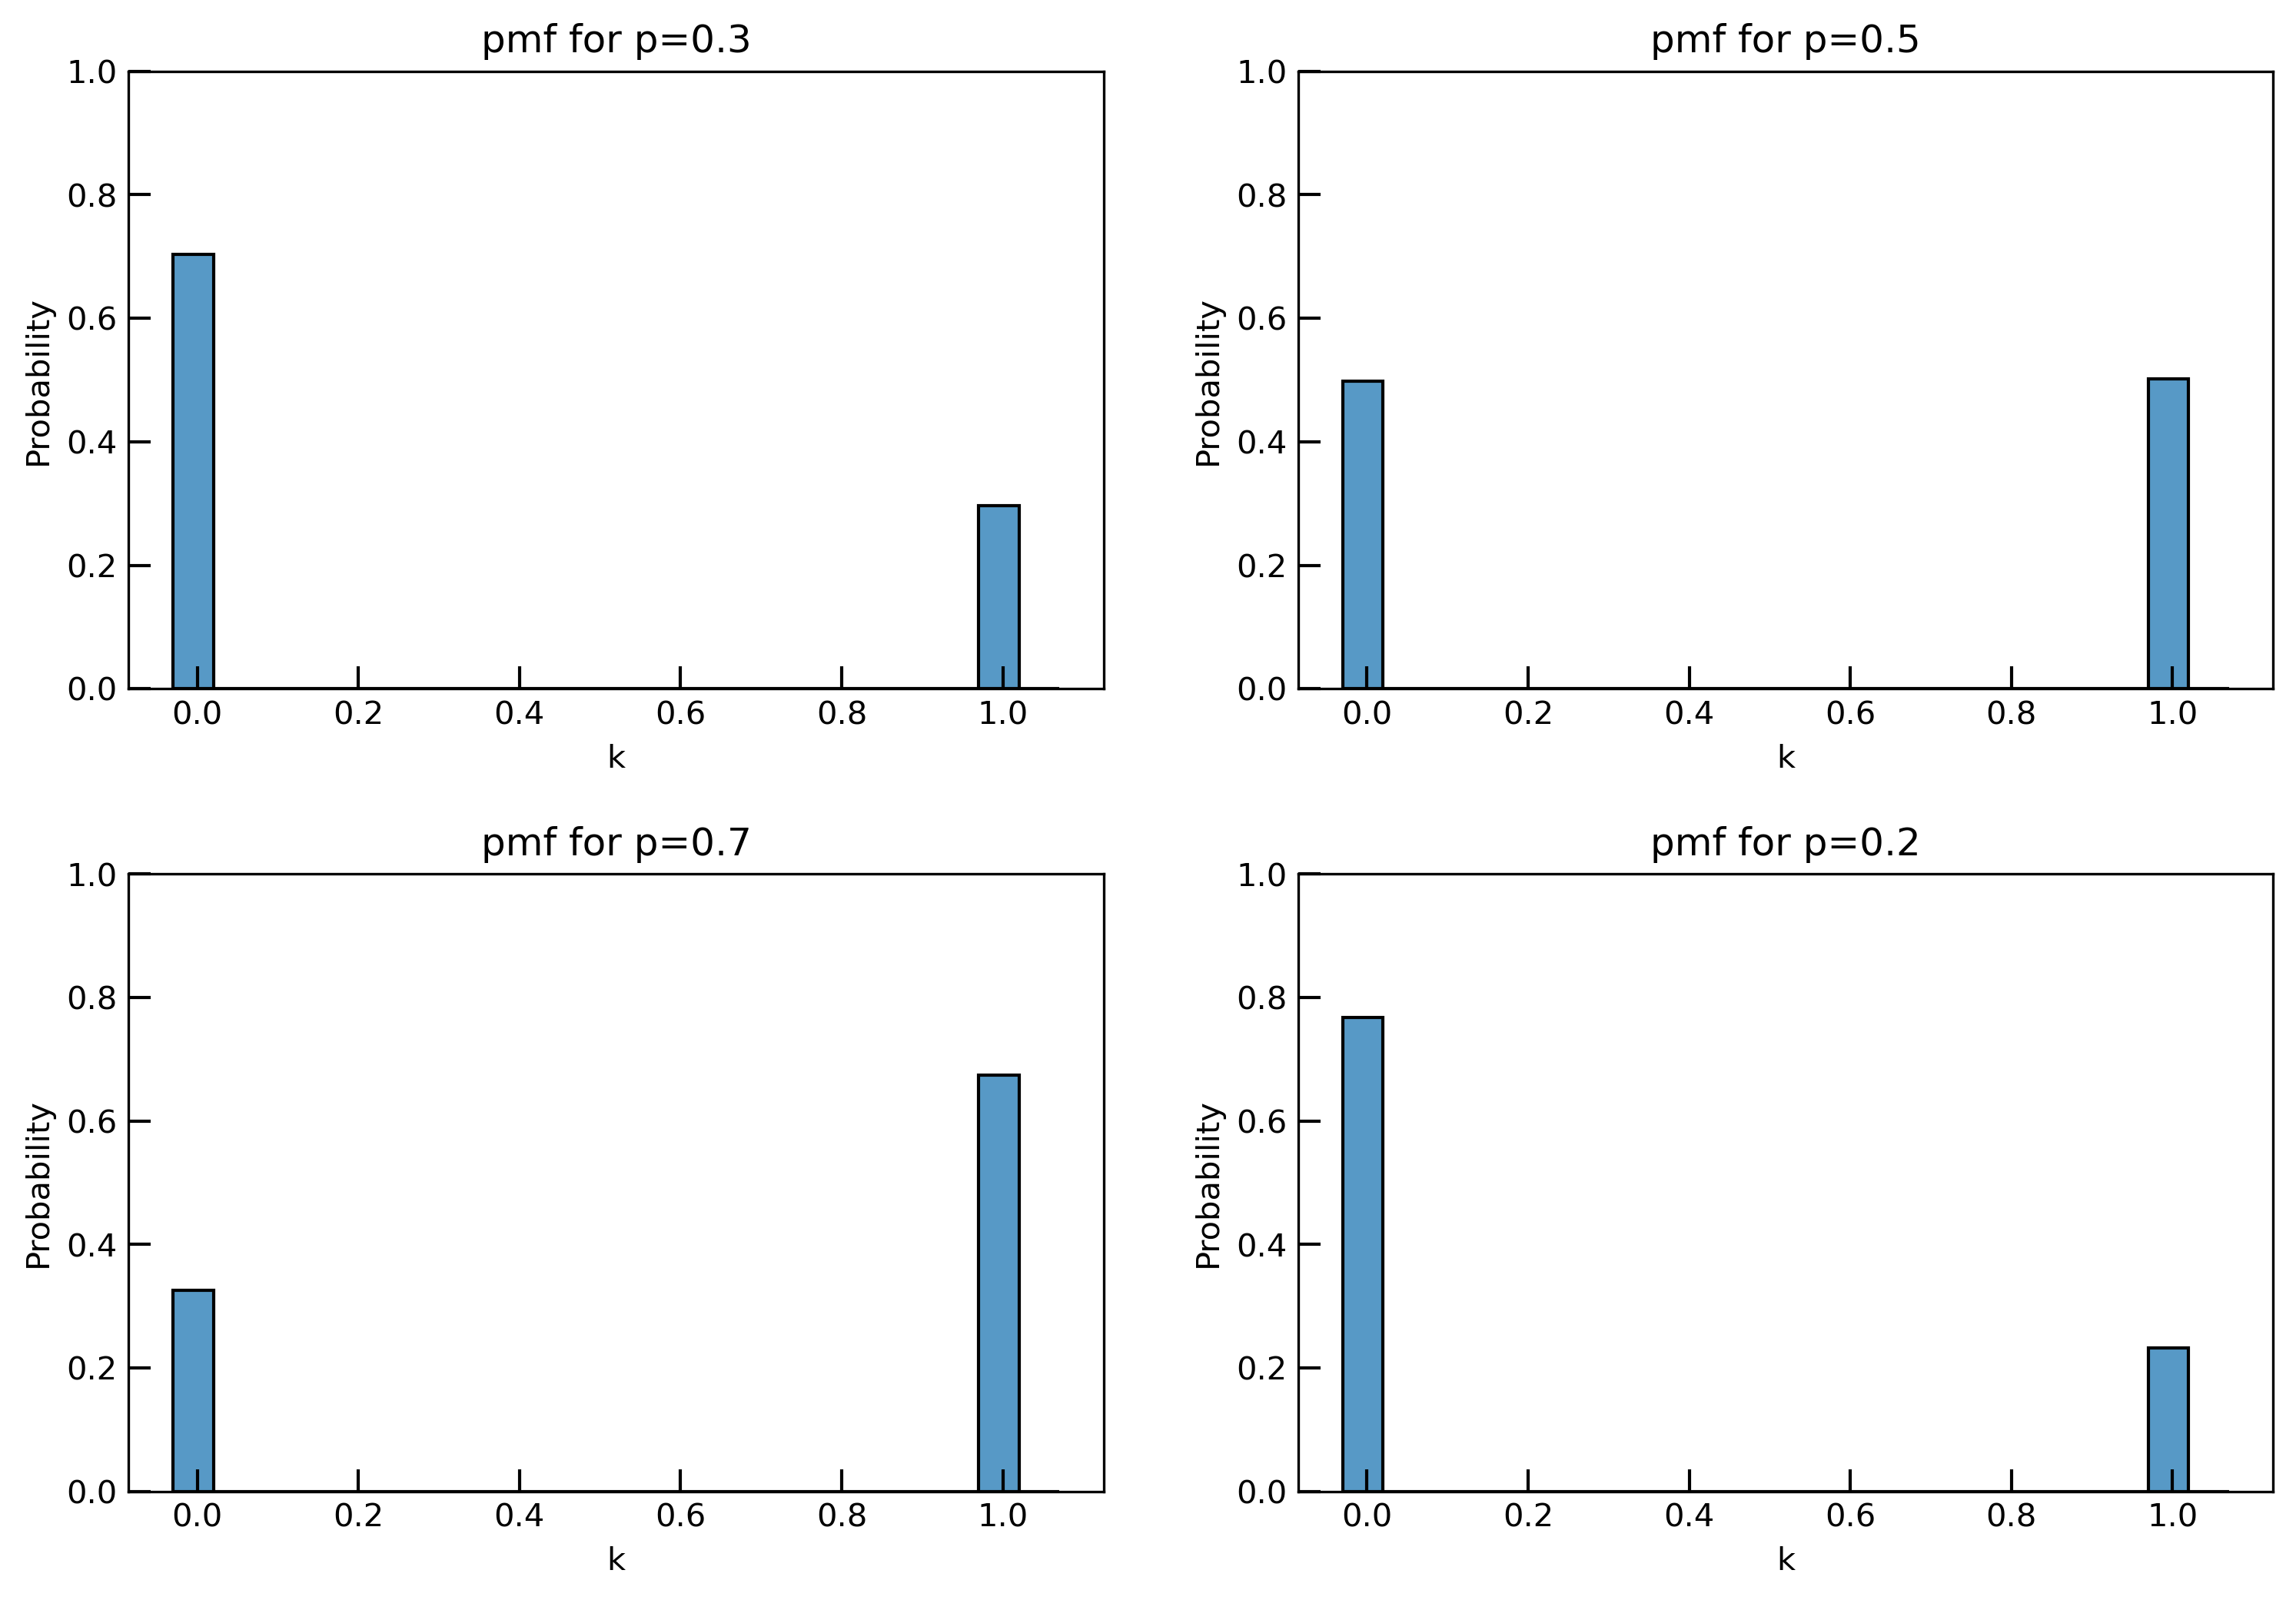

In [98]:
#lets make use of subplots - allows us to have multiple plots in 1 figure 
#we have four values of p, and so a 2 by 2 figure seems reasonable 


row_num,col_num=2,2 
fig,ax = plt.subplots(row_num,col_num) #declare your figure 
fig.set_size_inches(6*col_num,4*row_num) #size formatting 
fig.set_dpi(300) #resolution 

axs=ax.ravel() #optional, my personal preference to access the subplots of the figure

ps = np.array([0.3,0.5,0.7,0.22])
for i, p in enumerate(ps):
    r = bernoulli.rvs(p, size=1000) #sampling    
    
    sns.histplot(r, stat='probability',  binwidth=0.05, binrange=[-0.03, 1.05], ax=axs[i]) #format the bins and ticks such that the bins are more narrow and the ticks are at the center of the bins
    axs[i].set_ylim([0,1]) #the probability values range from 0 to 1
    axs[i].tick_params(axis='both', which='major', direction='in', length=7, width=1) #its common to have ticks face inwards 
    axs[i].set_xlabel('k') #label your axes
    axs[i].set_title('pmf for p={0:0.1f}'.format(p))

fig.subplots_adjust(hspace=0.3) #space out the plots

#save your figure
plt.savefig(r'Bernouli Plot.png', dpi=300, bbox_inches = "tight")

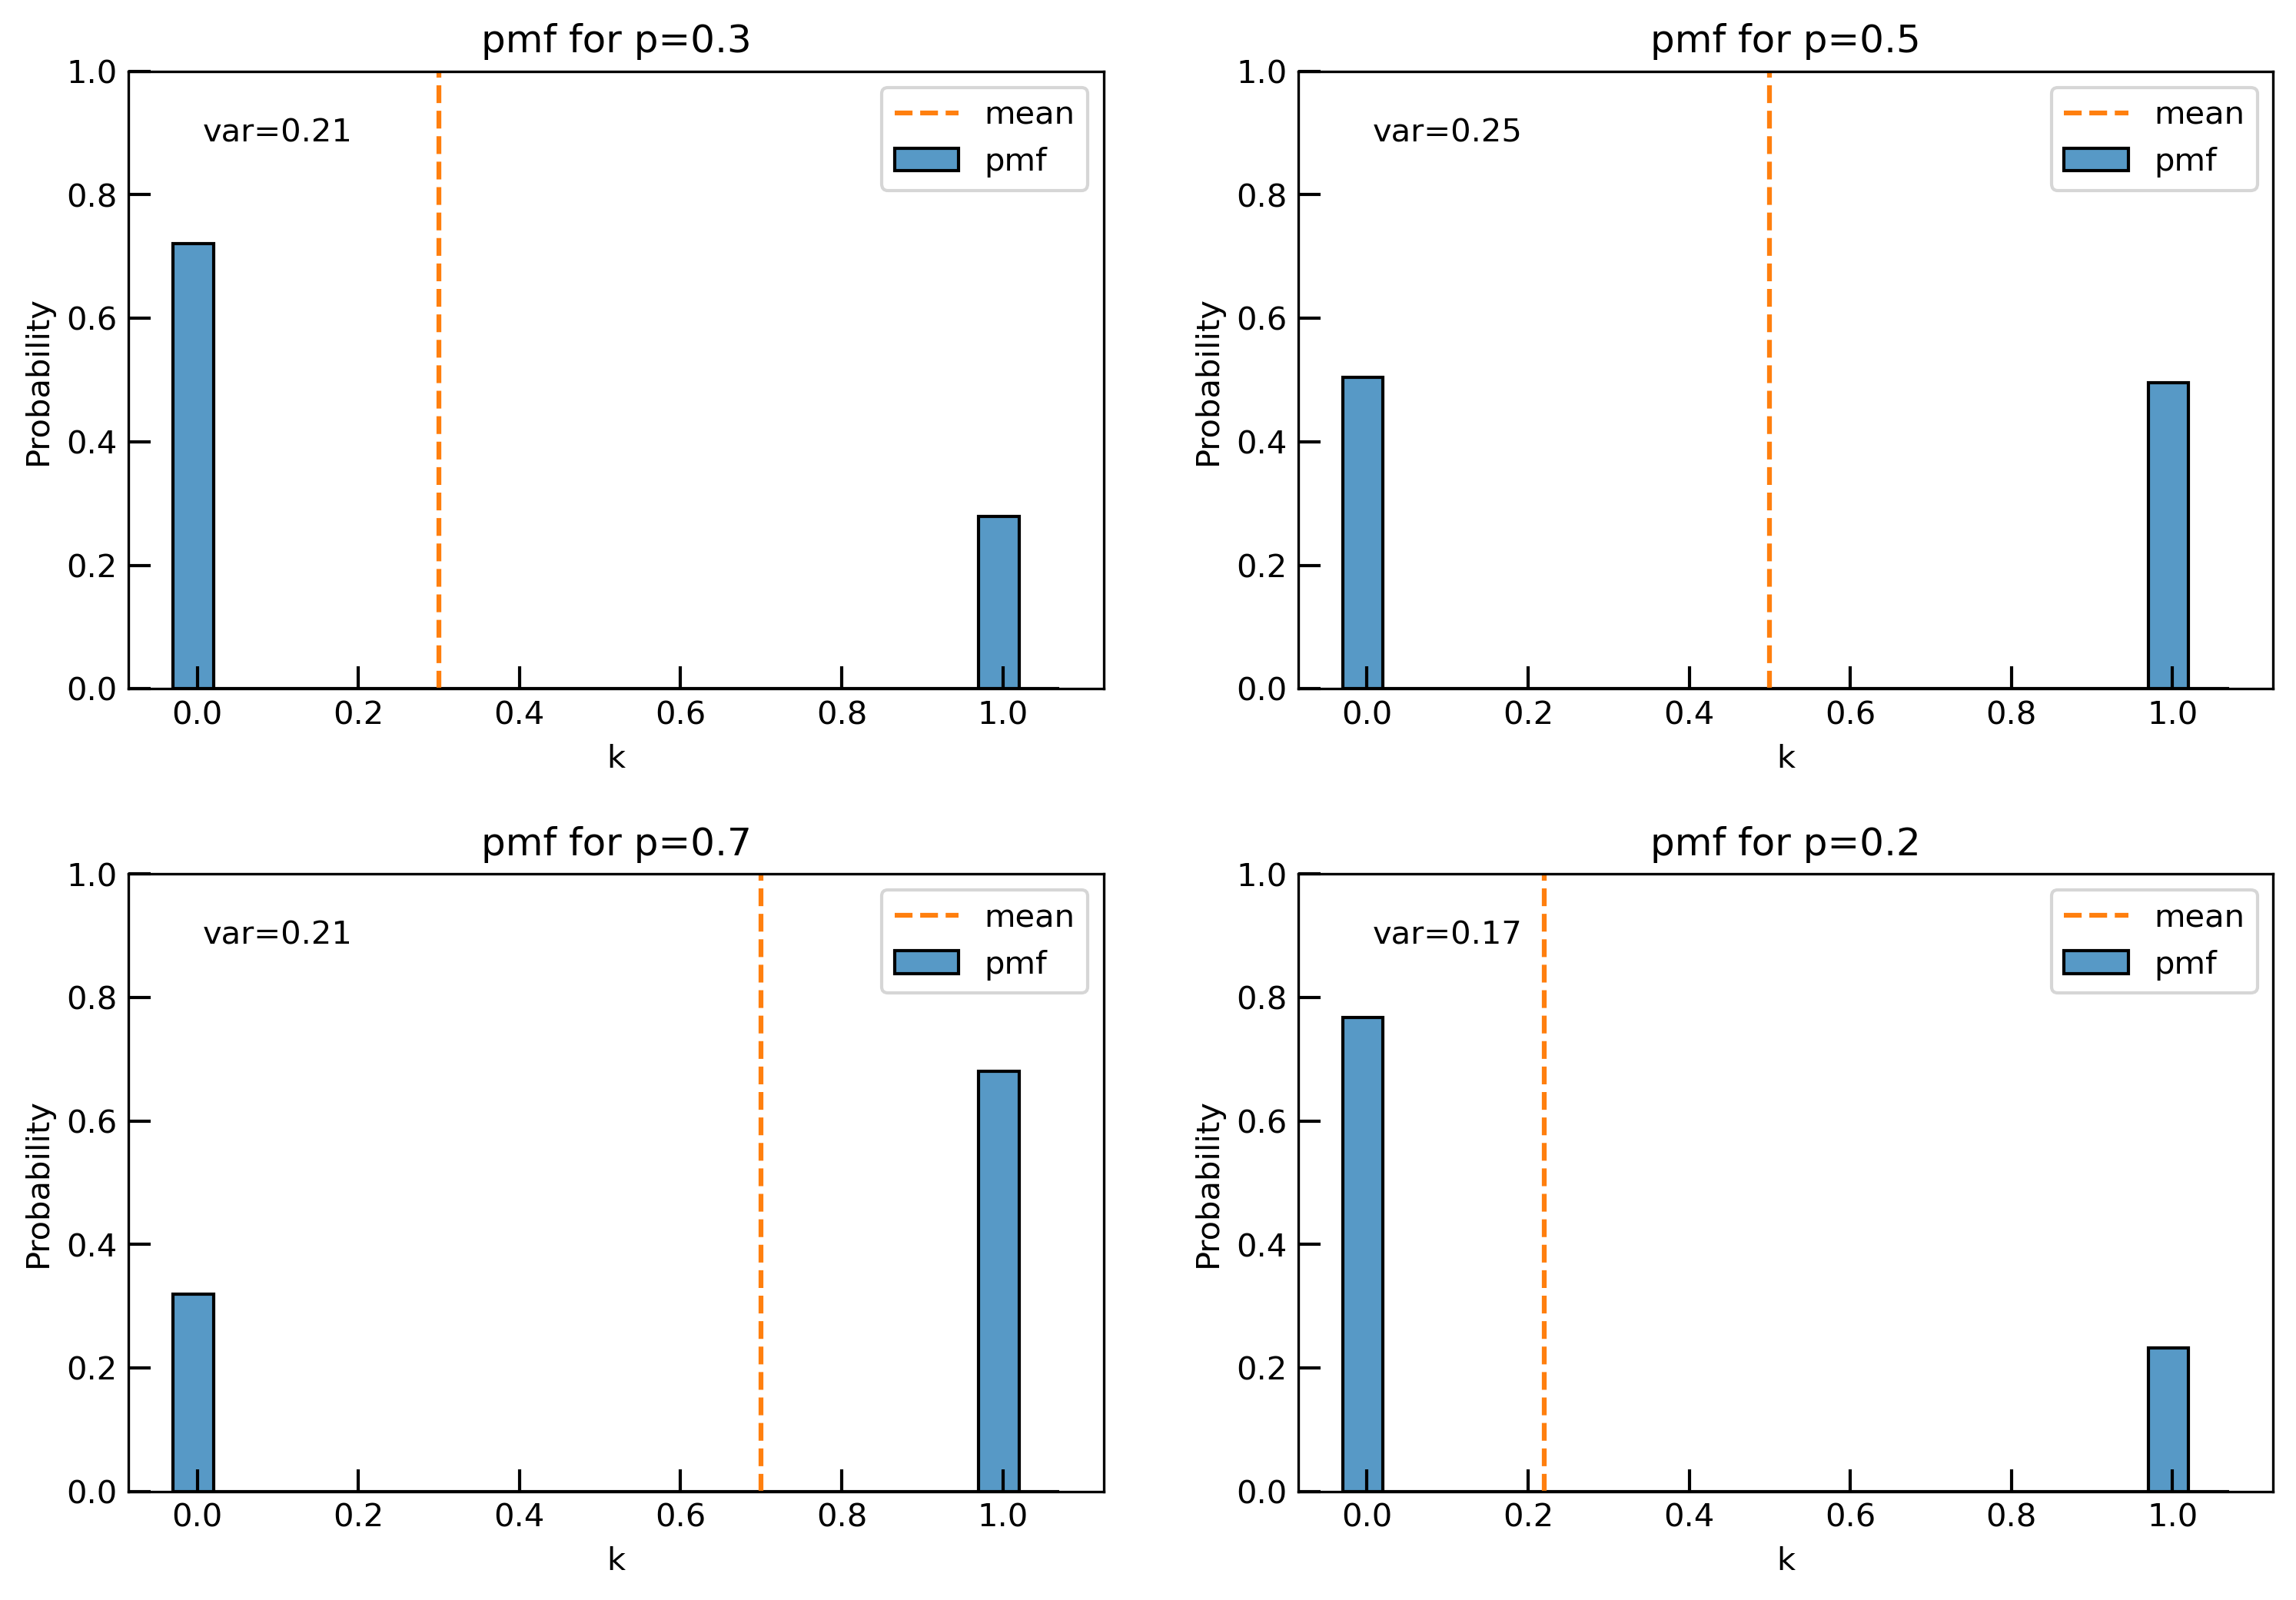

In [113]:
#optional: add the mean and variance to the plots, either as a line or text, with a legend declaring what's displayed

row_num,col_num=2,2 
fig,ax = plt.subplots(row_num,col_num) #declare your figure 
fig.set_size_inches(6*col_num,4*row_num) #size formatting 
fig.set_dpi(300) #resolution 

axs=ax.ravel() #optional, my personal preference to access the subplots of the figure

ps = np.array([0.3,0.5,0.7,0.22])
for i, p in enumerate(ps):
    r = bernoulli.rvs(p, size=1000) #sampling    
    
    sns.histplot(r, stat='probability',  binwidth=0.05, binrange=[-0.03, 1.05], ax=axs[i], label='pmf') #format the bins and ticks such that the bins are more narrow and the ticks are at the center of the bins
    axs[i].set_ylim([0,1]) #the probability values range from 0 to 1
    axs[i].tick_params(axis='both', which='major', direction='in', length=7, width=1) #its common to have ticks face inwards 
    axs[i].set_xlabel('k') #label your axes
    axs[i].set_title('pmf for p={0:0.1f}'.format(p))

    #add mean and variance, we will add the mean as a line and the variance as a text
    axs[i].axvline(x=mean_list[i], linestyle='dashed', color='tab:orange', label='mean')
    axs[i].text(x=0.1, y=0.9, s='var={0:0.02f}'.format(var_dict[p],2), va='center', ha='center')
    axs[i].legend()

fig.subplots_adjust(hspace=0.3) #space out the plots

#save your figure
plt.savefig(r'Bernouli Plot with Mean and Variance.png', dpi=300, bbox_inches = "tight")